
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Gabriel Vergara Schifferli

**Rol**: 201510519-7

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits_dict["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [69]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [7]:
numeros = []
for i in range(0,10):
   numeros.append( digits.loc[ digits["target"] == i ])

In [72]:
numeros[0].describe()


,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.0,178.000000,...,178.0,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.0
mean,0.0,0.022472,4.185393,13.095506,11.297753,2.926966,0.033708,0.0,0.0,0.887640,...,0.0,0.0,0.005618,4.157303,13.561798,13.325843,5.438202,0.275281,0.0,0.0
std,0.0,0.211400,2.946684,2.246625,3.417485,3.232996,0.180985,0.0,0.0,1.778327,...,0.0,0.0,0.074953,2.715924,2.013823,2.717490,4.001285,0.931287,0.0,0.0
min,0.0,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.000000,2.000000,12.000000,9.000000,1.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,2.000000,12.000000,12.000000,2.000000,0.000000,0.0,0.0
50%,0.0,0.000000,4.000000,13.000000,12.000000,2.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,4.000000,14.000000,14.000000,5.000000,0.000000,0.0,0.0
75%,0.0,0.000000,6.000000,15.000000,14.000000,5.000000,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.000000,6.000000,15.000000,15.000000,8.000000,0.000000,0.0,0.0
max,0.0,2.000000,12.000000,16.000000,16.000000,14.000000,1.000000,0.0,0.0,13.000000,...,0.0,0.0,1.000000,11.000000,16.000000,16.000000,16.000000,7.000000,0.0,0.0


In [64]:
numeros[0].describe().iloc[2]

c00       0.000000
c01       0.211400
c02       2.946684
c03       2.246625
c04       3.417485
            ...   
c60       2.717490
c61       4.001285
c62       0.931287
c63       0.000000
target    0.000000
Name: std, Length: 65, dtype: float64

graficos de frecuencio número 0


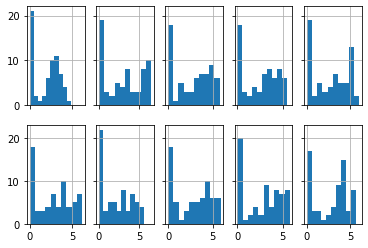

In [63]:
fig, ax = plt.subplots(2, 5, sharex='col', sharey='row')
print("graficos de frecuencio número 0")
for i in range(0,5):
    numeros[i].describe().iloc[2].hist(ax=ax[0,i]),
    numeros[i +5].describe().iloc[2].hist(ax=ax[1,i])

Estos gráficos muestran la frecuencia que hay en la media para cada casilla de la imagen para los números 0 hasta 9. Entonces esto muestra el patron medio que tiene un número asociado a su dibujo.

In [65]:
###
# LA MEMORIA UTILIZADA
import sys
Memoria = digits.memory_usage()
total = (Memoria[1]*65)/1000 
                            
print(total, 'kilobytes')

467.22 kilobytes


In [79]:
for i in range(0,10):
    print("hay %f resgistros para la clase %s" % ( numeros[i].shape[0] , i ) )

hay 178.000000 resgistros para la clase 0
hay 182.000000 resgistros para la clase 1
hay 177.000000 resgistros para la clase 2
hay 183.000000 resgistros para la clase 3
hay 181.000000 resgistros para la clase 4
hay 182.000000 resgistros para la clase 5
hay 181.000000 resgistros para la clase 6
hay 179.000000 resgistros para la clase 7
hay 174.000000 resgistros para la clase 8
hay 180.000000 resgistros para la clase 9


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

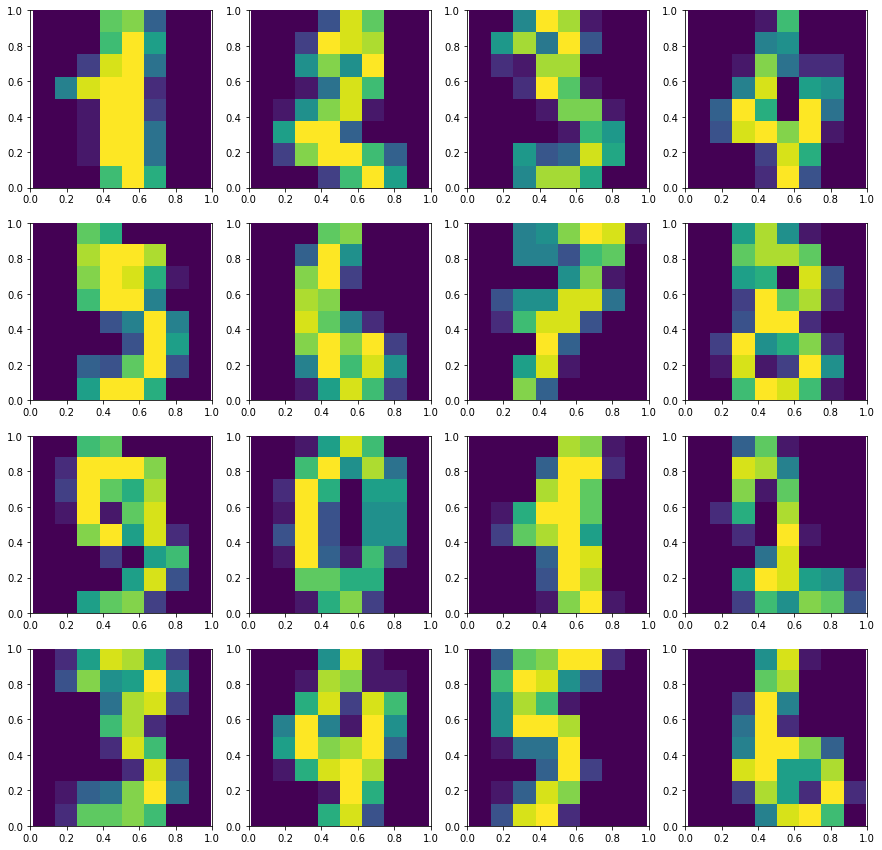

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
for i in range(1, 17):
    img = digits_dict["images"][i]
    fig.add_subplot(4, 4, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
x = digits.drop(columns="target").values
y = digits["target"].values

**TRAIN-TEST SET**

In [14]:
from metrics_classification import summary_metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    train_size=0.80,
                                                    random_state=2020)
print('cantidad de datos para entrenamiento : ',len(x_train))
print('cantidad de datos para testeo        : ',len(x_test))

cantidad de datos para entrenamiento :  1437
cantidad de datos para testeo        :  360


**MODELO**

In [16]:
#REGRESIÓN LOGÍSTICA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
parameters = { 
            'penalty' : ['l2', None],
            'class_weight' : ['balanced', None],
            'solver' : ['liblinear', 'lbfgs'],
            'random_state':[2020]
}
lr = LogisticRegression()

lr_gridsearchcv = GridSearchCV(estimator = lr,
                               param_grid = parameters,
                               cv = 10)
lr_grid_result = lr_gridsearchcv.fit(x_train, y_train)

C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Gabriel\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knnparameters = { 
            'metric'  : ['euclidean', 'manhattan'],
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree']
}
knn_gridsearchcv = GridSearchCV(estimator = knn,
                               param_grid = knnparameters,
                               cv = 10)
knn_grid_result = knn_gridsearchcv.fit(x_train, y_train)

In [18]:
#PERCEPTRON
from sklearn.linear_model import Perceptron

per =  Perceptron()
Pparameters ={
                    'penalty' : ['l2','l1','elasticnet', None],
                    'tol':[1e-3,1e-5,1e-1],
                    'alpha' : [0.0001, 0.00001,0.000001]
                   }

scores = ['precision', 'recall']

P_gridsearchcv = GridSearchCV(estimator = per,
                              param_grid = Pparameters,
                              cv = 10)

p_grid_result = P_gridsearchcv.fit(x_train, y_train)

In [19]:
print("LOGISTIC REGRESSION")
print("El mejor tiempo es de LR: %f usando %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))
#Calculo de métricas con matriz de confusión
lr_predict = lr_gridsearchcv.predict(x_test)
d = dict( y=y_test, yhat = lr_predict)
df= pd.DataFrame.from_dict(d, orient='index').transpose()
print(confusion_matrix(y_test,lr_predict))
print(sm(df))
print('')
########################################
print("KNN")
print("El mejor tiempo es de KNN: %f usando %s" % (knn_grid_result.best_score_, knn_grid_result.best_params_))
knn_predict = knn_gridsearchcv.predict(x_test)
d = dict( y=y_test, yhat = knn_predict)
df= pd.DataFrame.from_dict(d, orient='index').transpose()
print(confusion_matrix(y_test,knn_predict))
print(sm(df))
print('')
#########################################
print("SGDR")
print("El mejor tiempo es de SGDR: %f usando %s" % (p_grid_result.best_score_, p_grid_result.best_params_))
p_predict = P_gridsearchcv.predict(x_test)
d = dict( y=y_test, yhat = p_predict)
df= pd.DataFrame.from_dict(d, orient='index').transpose()
print(confusion_matrix(y_test,p_predict))
print(sm(df))
print('')

LOGISTIC REGRESSION
El mejor tiempo es de LR: 0.959630 usando {'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 2020, 'solver': 'lbfgs'}
[[37  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  1  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  1]
 [ 1  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 1  0  0  0  1  0  0  0 27  0]
 [ 0  0  0  0  1  0  0  0  1 33]]
   accuracy  recall  precision  fscore
0    0.9694   0.969     0.9712  0.9698

KNN
El mejor tiempo es de KNN: 0.985383 usando {'algorithm': 'auto', 'metric': 'euclidean', 'weights': 'uniform'}
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 3

**RESUMEN:** el método knn y lr tienen un tiempo de ejecución similar, siendo lr el más rápido y perceptron el más lento.

En cuanto a la cantidad de aciertos y errores, el método knn tiene la accuracy más alta y perceptron la peor. Esto se mantiene esta misma relación en cuanto a  recall, presición y fscore.

Por lo tanto el método que mejor se adapta en este caso es el KNN.




### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [20]:
#Cross Validation usando KNN
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=knn_gridsearchcv,
                            X=x_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.99, 0.98, 0.98, 0.98, 0.99, 0.99, 1.0, 0.99, 0.99, 0.98] 
Precision promedio:  0.987 +/-  0.006


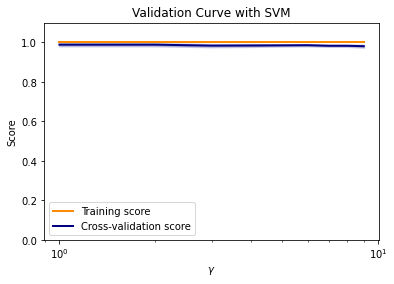

In [21]:

#curva de validación

from sklearn.model_selection import validation_curve

param_range = np.array([i for i in range(1, 10)])

#Validation curve usando los mejores hiperparámetros 
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights = 'distance',
                         metric = 'euclidean'),
    x_train, y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

la curva de cross validation es practicamente constante, por lo tanto, se tiene que el modelo de knn se comporta de buena forma independiente de la cantidad de clusters dado que hay un leve decresimiento.

In [22]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

index = np.argmax(test_scores_mean)
param_range[index]

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    train_size=0.80,
                                                    random_state=2020)

classifier = KNeighborsClassifier(weights = 'distance',metric = 'euclidean', n_neighbors = param_range[index])
y_score = classifier.fit(x_train, y_train).predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

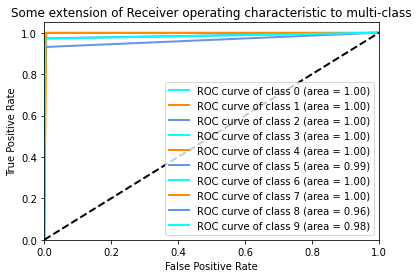

In [23]:
#AOC-ROC para multiples clases (código también obtenido del link)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

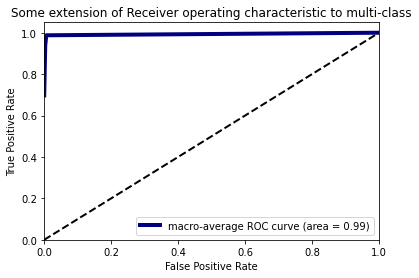

In [24]:
#Curva promedio de las multi-clases

import sys
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [25]:
#SELECCIÓN DE ATRIBUTOS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_training = digits.drop(columns="target")
y_training = digits["target"]
x_training = x_training.drop(['c00','c32','c39'],axis=1)


k = 30  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
X_a=x_training[atributos]

In [28]:
start_time = time.time()
knn_grid_result = knn_gridsearchcv.fit(x_training, y_training)
print("%s segundos, que demora antes de seleccionar atributos" % (time.time() - start_time))

start_time = time.time()
knn_grid_result = knn_gridsearchcv.fit(X_a, y_training)
print('%s segundos, que demora despues de seleccionar atributos' % (time.time() - start_time))

tiempo de 4.0168678760528564 segundos, que demora antes de seleccionar atributos
tiempo de 2.3130300045013428 segundos, que demora despues de seleccionar atributos


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [33]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = np.array(y_pred)[mask]
    
    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    fix = X_aux.shape[0]
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < fix:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred,
                              horizontalalignment='center',
                              verticalalignment='center',
                              fontsize=10,
                              color=color)
                ax[i][j].text(7, 0, label_true,
                              horizontalalignment='center',
                              verticalalignment='center',
                              fontsize=10,
                              color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

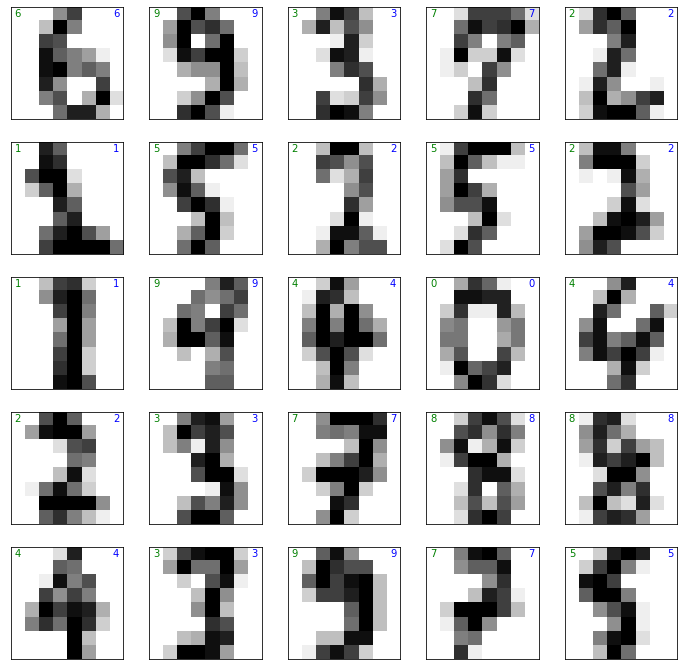

In [34]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "correctos")

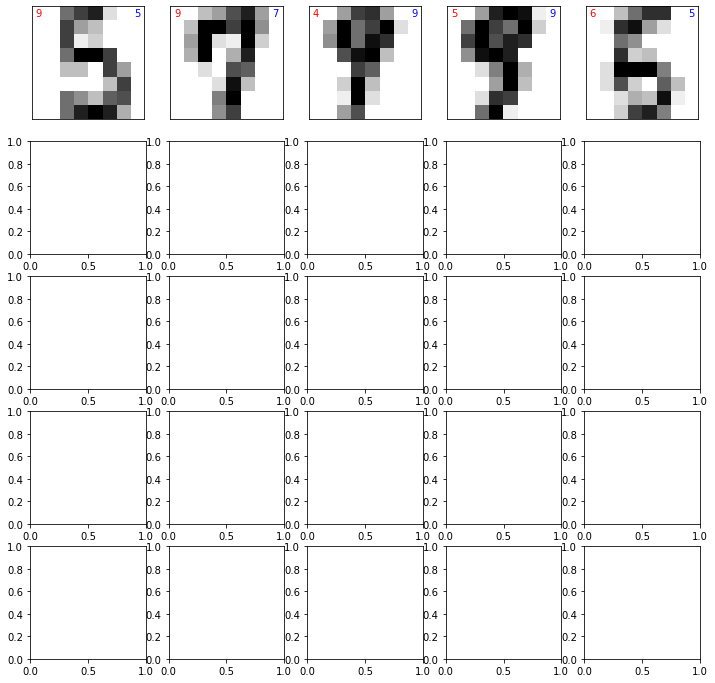

In [37]:
mostar_resultados(digits,KNeighborsClassifier(),nx=5, ny=5,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El mejor resultado se obtiene utilizando el algoritmo KNN según las métricas analizadas.  Para este caso se tienen 5 predicciones fallidas,  para el tamaño de muestra que se tiene, la clasificación es bastante buena por lo que sirve como modelo de identificación de digitos con alta presición, tomando en cuenta que incluso yo de vez en cuando escribo nueros y los confudo.

Como se tiene un buen comportamiento en relación a la cantidad de clusters que utiliza el knn, se puede extrapolar a identificación de números con mayor cantidad de dígitos, independiente que se podría fragmentar el número y llevarlo al problema estudiado.